In [1]:
# Imports the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# imports citipy information
from citipy import citipy
from config import weather_api_key
# imports datetime
from datetime import datetime
# imports requests for API
import requests
# imports linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Generate random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Createslist for holding cities
cities = []
# Finds cities close to our randomly generated coordinates of latitudes and longitiudes
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Appends new cities to list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [5]:
# Beginning part of URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3b1524b72c9d769d7f291461dd29131e


In [6]:
# Creates empty list that will hold weather data for cities
city_data = []
# Beginning of data retrieval
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in list
for i, city in enumerate(cities):

    # Groups cities to more managable size (631 cities into groups of 50)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Creates endpoint URL with each city from our list
    city_url = url + "&q=" + city

    # Logs the URL, records it, and sets numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Adds 1 to the record count
    record_count += 1
    
    # Runs an API request for each of the cities
    try:
        # Parses the JSON and retrieves data
        city_weather = requests.get(city_url).json()
        # Retrieves the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skips the city
    except:
        print("City not found. Skipping...")
        pass

# Indicates completed data retrieval
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | zyryanka
Processing Record 5 of Set 1 | kenai
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | port hueneme
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | chegem
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sumenep
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | axim
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | chicama
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | cividale del friuli
Processing Record 21 of Set 1 | north bend
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | sa

Processing Record 38 of Set 4 | richards bay
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | wanning
Processing Record 42 of Set 4 | fergus falls
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | saint combs
City not found. Skipping...
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | eisiskes
Processing Record 47 of Set 4 | mutis
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | beatrice
Processing Record 50 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | grand gaube
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | vredendal
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | port keats
Processing Record 9 of Set 5 | ter

Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | patan
Processing Record 29 of Set 8 | vad
Processing Record 30 of Set 8 | ukiah
Processing Record 31 of Set 8 | ocos
Processing Record 32 of Set 8 | monrovia
Processing Record 33 of Set 8 | rock sound
Processing Record 34 of Set 8 | isiro
Processing Record 35 of Set 8 | svetlogorsk
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | kulhudhuffushi
Processing Record 38 of Set 8 | hammerfest
Processing Record 39 of Set 8 | farafangana
Processing Record 40 of Set 8 | nizhniy tsasuchey
Processing Record 41 of Set 8 | hualmay
Processing Record 42 of Set 8 | alamos
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | dzhebariki-khaya
Processing Record 46 of Set 8 | guymon
Processing Record 47 of Set 8 | balykshi
City not found. Skipping...
Processing Record 48 of Set 8 | siraha
Processing Record 49 of Set 8 | tevaitoa
Processing Record 50 of

Processing Record 8 of Set 12 | pronsk
Processing Record 9 of Set 12 | aloleng
Processing Record 10 of Set 12 | kristiinankaupunki
Processing Record 11 of Set 12 | juifang
City not found. Skipping...
Processing Record 12 of Set 12 | inverness
Processing Record 13 of Set 12 | nanchang
Processing Record 14 of Set 12 | fairlie
Processing Record 15 of Set 12 | samarai
Processing Record 16 of Set 12 | andenes
Processing Record 17 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 12 | carutapera
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | ilinogorsk
City not found. Skipping...
Processing Record 21 of Set 12 | macheng
Processing Record 22 of Set 12 | ramnagar
Processing Record 23 of Set 12 | north valley
Processing Record 24 of Set 12 | olenino
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | karabash
Processing Record 27 of Set 12 | saint-pierre
-----------------------------
Data Retrieval Complete      
------

In [7]:
# Convert the array to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.80,102.27,84.81,68,77,4.85,ID,2020-04-18 02:06:39
1,Hobart,-42.88,147.33,55.40,43,40,14.99,AU,2020-04-18 02:01:55
2,Nikolskoye,59.70,30.79,37.40,89,75,15.66,RU,2020-04-18 02:06:40
3,Zyryanka,65.75,150.85,5.22,92,100,20.49,RU,2020-04-18 02:06:40
4,Kenai,60.55,-151.26,48.20,70,90,3.44,US,2020-04-18 02:06:40
5,Kapaa,22.08,-159.32,80.60,61,1,11.41,US,2020-04-18 02:06:40
6,Port Macquarie,-31.43,152.92,75.00,56,100,1.01,AU,2020-04-18 02:05:06
7,Pevek,69.70,170.31,8.28,93,23,9.26,RU,2020-04-18 02:03:16
8,Port Hueneme,34.15,-119.20,63.00,59,75,4.70,US,2020-04-18 02:06:41
9,Albany,42.60,-73.97,41.00,75,100,3.87,US,2020-04-18 02:06:41


In [8]:
# Changes column order for parsing
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2020-04-18 02:06:39,-3.80,102.27,84.81,68,77,4.85
1,Hobart,AU,2020-04-18 02:01:55,-42.88,147.33,55.40,43,40,14.99
2,Nikolskoye,RU,2020-04-18 02:06:40,59.70,30.79,37.40,89,75,15.66
3,Zyryanka,RU,2020-04-18 02:06:40,65.75,150.85,5.22,92,100,20.49
4,Kenai,US,2020-04-18 02:06:40,60.55,-151.26,48.20,70,90,3.44


In [10]:
# Creates the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export city_data to to a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extracts relevant data that will be used for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Imports the time module
import time
# Gets today's date in second
today = time.time()
today

1587175739.148246

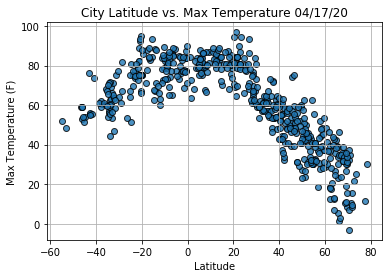

In [13]:
# Builds a scatter plot for the latitude vs the max temperature
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = 0.8, label = "Cities")

# Adds title, labels, and grid
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves figure
plt.savefig("weather_data/Fig1.png")

# Shows plot
plt.show()

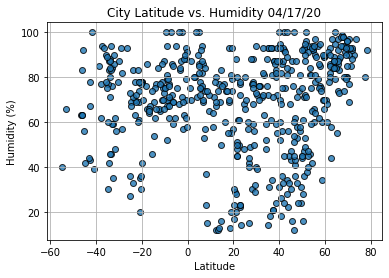

In [14]:
# Builds the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker = "o",
            alpha = 0.8, label = "Cities")

# Adds title, labels, and grid
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig2.png")
# Shows the graph
plt.show()

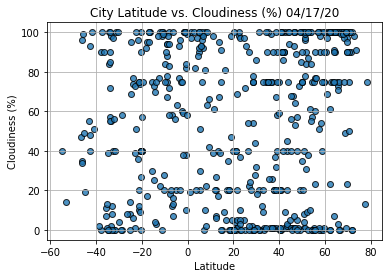

In [15]:
# Builds a scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black",
            linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig3.png")
# Shows the plot
plt.show()

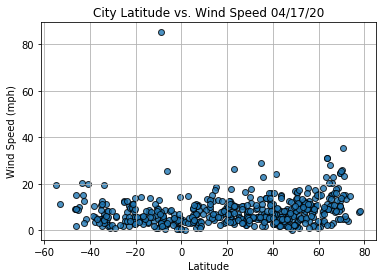

In [16]:
# Builds a scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1,
            marker = "o", alpha = 0.8, label = "Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig4.png")
# Shows the plot
plt.show()

In [17]:
# Creates a function to create perform linear regression on the weather data
# Then plots the regression line 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Creates and saves Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

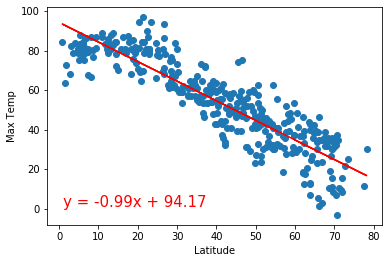

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

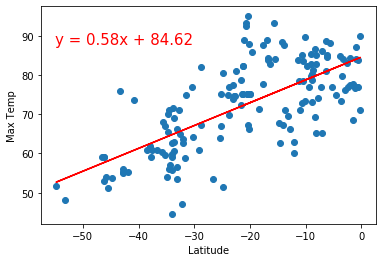

In [20]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Calls the function with the values
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispher for Maximum Temperature',
                       'Max Temp',(-55,88))

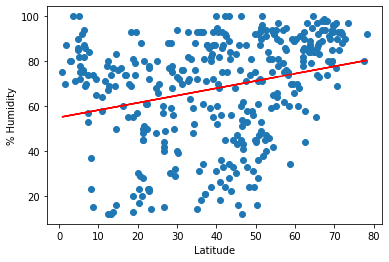

In [21]:
# Linear regression on the Northern Hemisphere for the humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Calls fn
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,5))

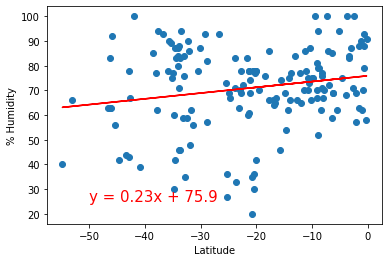

In [22]:
# Linear regression on the Southern Hemisphere for the humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,25))

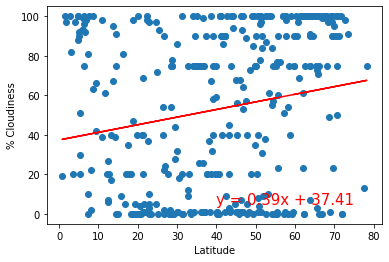

In [23]:
# Linear regression on the Northern Hemisphere for the cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Calls fn
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,5))

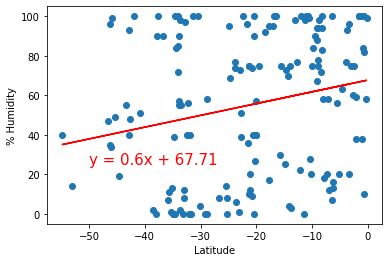

In [24]:
# Linear regression on the Southern Hemisphere for the cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,25))

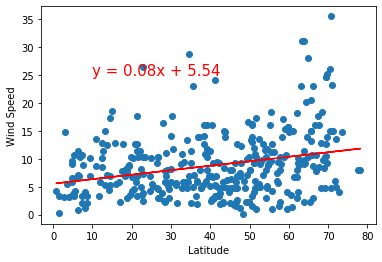

In [25]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(10,25))

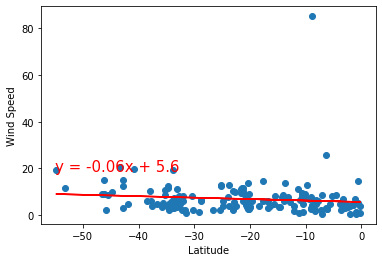

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Calls the functions
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-55,19))